In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
#Load the dataset and drop the "Id" column:
df = pd.read_csv("C:/Users/mattl/OneDrive/Documents/GitHub/DSC550/Week 6/train (1).csv")
df = df.drop("Id", axis=1)

In [3]:
#Remove features with more than 40% missing values:
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)

In [4]:
#Fill missing values for numerical and categorical columns:
# Numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Categorical columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [5]:
#Convert categorical columns to dummy variables:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [6]:
#Split the data into training and test sets:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Run a linear regression model:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2:", r2)
print("RMSE:", rmse)

R2: 0.644365513657448
RMSE: 52228.65612642937


In [8]:
#Fit and transform the training features with PCA to retain 90% of the variance:
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train)

In [9]:
#Get the number of features in the PCA-transformed matrix:
num_pca_features = X_train_pca.shape[1]
print("Number of PCA features:", num_pca_features)

Number of PCA features: 1


In [10]:
#Transform (but do not fit) the test features with the same PCA:
X_test_pca = pca.transform(X_test)

In [11]:
#Repeat step 7 with the PCA-transformed data:
regressor.fit(X_train_pca, y_train)
y_pred_pca = regressor.predict(X_test_pca)

r2_pca = r2_score(y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
print("R2 with PCA:", r2_pca)
print("RMSE with PCA:", rmse_pca)

R2 with PCA: 0.06348978218204926
RMSE with PCA: 84754.58021267966


In [12]:
# 1. Apply Min-Max scaling and variance threshold to both training and test data consistently

# Apply Min-Max scaling to both training and test data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#Find features with variance above 0.1 in the scaled data:
# Apply the variance threshold to both training and test data
variance_threshold = 0.1
high_variance_cols = X_train.columns[X_train_scaled.var(axis=0) > variance_threshold]
X_train_scaled = X_train_scaled[:, X_train.columns.isin(high_variance_cols)]
X_test_scaled = X_test_scaled[:, X_test.columns.isin(high_variance_cols)]


In [14]:
# 2. Repeat step 7 with the high variance data (with the corrected data)

regressor.fit(X_train_scaled, y_train)
y_pred_scaled = regressor.predict(X_test_scaled)

r2_scaled = r2_score(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print("R2 with high variance features:", r2_scaled)
print("RMSE with high variance features:", rmse_scaled)

R2 with high variance features: 0.6616633820770925
RMSE with high variance features: 50942.63663479869


In [15]:
print("In summary, the selection of features with high variance seems to be a better strategy for improving model performance compared to using PCA, as indicated by the R2 and RMSE metrics. This approach results in a model with a better ability to explain variance and lower prediction errors in the context of housing price prediction.")

In summary, the selection of features with high variance seems to be a better strategy for improving model performance compared to using PCA, as indicated by the R2 and RMSE metrics. This approach results in a model with a better ability to explain variance and lower prediction errors in the context of housing price prediction.


In [16]:
# Load the dataset
data = pd.read_csv("C:/Users/mattl/OneDrive/Documents/GitHub/DSC550/mushrooms.csv")

In [17]:
data = pd.get_dummies(data, drop_first=True)

In [18]:
X = data.drop('class_p', axis=1)  # Features
y = data['class_p']  # Target variable (poisonous)

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create and train a decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]


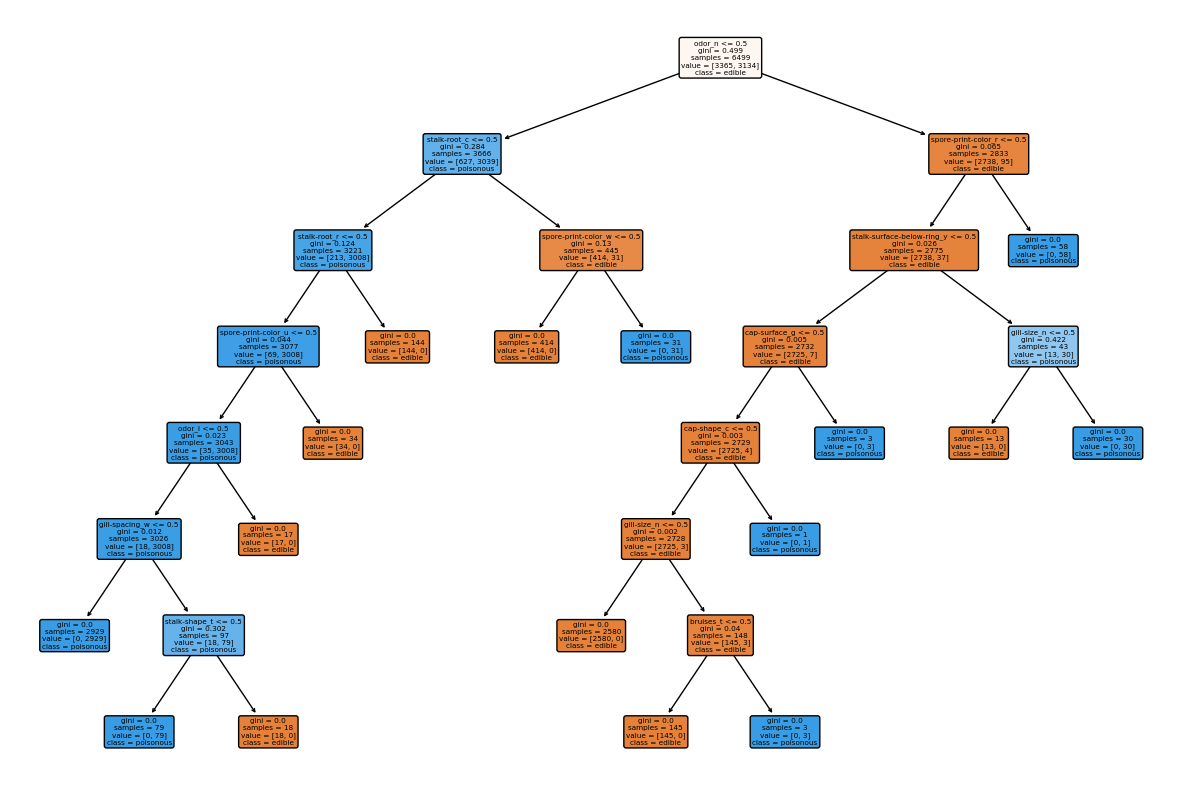

In [21]:
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=X.columns, class_names=["edible", "poisonous"], filled=True, rounded=True)
plt.show()

In [22]:
# Select the top 5 features using chi-squared selector
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


In [23]:
# Split the data with the selected features into a training and test set
X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]

# Create and train a decision tree classifier with the selected features
classifier_new = DecisionTreeClassifier(random_state=42)
classifier_new.fit(X_train_new, y_train)

# Make predictions on the test set with the selected features
y_pred_new = classifier_new.predict(X_test_new)

# Calculate accuracy with the selected features
accuracy_new = accuracy_score(y_test, y_pred_new)
print("Accuracy with selected features:", accuracy_new)

# Create a confusion matrix with the selected features
conf_matrix_new = confusion_matrix(y_test, y_pred_new)
print("Confusion Matrix with selected features:")
print(conf_matrix_new)

Accuracy with selected features: 0.9735384615384616
Confusion Matrix with selected features:
[[816  27]
 [ 16 766]]


In [24]:
print("By selecting the five best features using the χ2-statistic selector, you can reduce the dimensionality of the dataset while maintaining good accuracy. The selected features are crucial for classifying whether a mushroom is edible or poisonous, as they contain the most relevant information for the classification task. The decision tree classifier, both with the full set of features and the selected features, can effectively classify mushrooms as edible or poisonous.")

By selecting the five best features using the χ2-statistic selector, you can reduce the dimensionality of the dataset while maintaining good accuracy. The selected features are crucial for classifying whether a mushroom is edible or poisonous, as they contain the most relevant information for the classification task. The decision tree classifier, both with the full set of features and the selected features, can effectively classify mushrooms as edible or poisonous.
